## Libraries

In [1]:
# data analysis and data manipulation tool
import pandas as pd


#a free software machine learning library for the Python programming language
from sklearn import datasets

### Loading dataset

In [2]:
dts_iris = datasets.load_iris()

In [3]:
iris = pd.DataFrame(dts_iris['data'], columns=dts_iris.feature_names)
iris['label'] = dts_iris.target
iris['label'] = iris['label'].apply(lambda x: dts_iris.target_names[x])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Decision Tree

In [4]:
from sklearn import tree

### Separating idenpendent and target variables

In [5]:
X = iris.drop(['label'], axis=1)
y = iris['label']

### Building training and test sets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Defining an instance of a Decision Tree classifier

In [8]:
clf = tree.DecisionTreeClassifier()

### Fit the DT defined above

In [9]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Predicting the test set

In [10]:
y_pred = clf.predict(X_test)

### Evaluating

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
print(accuracy_score(y_test, y_pred)*100)

96.0


#### Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

Confusion matrix:
 [[12  0  0]
 [ 0 16  2]
 [ 0  0 20]]


/tmp/ipykernel_210849/3179007830.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_210849/3179007830.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


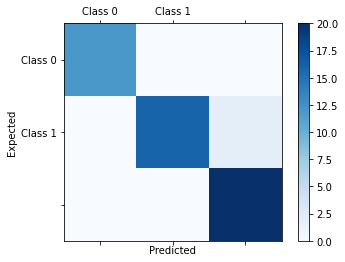

In [14]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Final model

In [15]:
clf.fit(dts_iris.data, dts_iris.target)

DecisionTreeClassifier()

## Plotting the final model

In [19]:
!pip install dtreeviz

In [20]:
# visualization library
from dtreeviz.trees import dtreeviz # remember to load the package

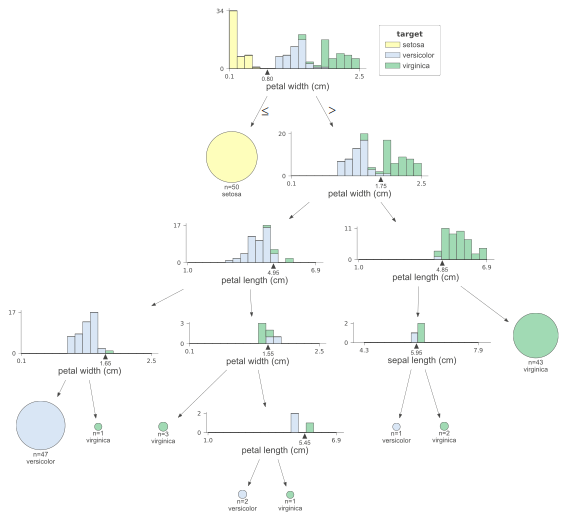

In [21]:
viz = dtreeviz(clf, dts_iris.data, dts_iris.target,
                target_name="target",
                feature_names=dts_iris.feature_names,
                class_names=list(dts_iris.target_names))
viz

# Random Forest